In [1]:
# now we are working on the discrete pdf of the random variable

import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import factorial
from scipy.stats import kurtosis
from scipy.stats import poisson

def print_stat_details(rv, name_of_rv, plot_offset = 0):
    # given pmf find mean, variance and kurtosis
    len_rv = len(rv)
    mean_rv = np.dot(np.arange(len_rv), rv)
    diff_from_mean_vect = np.arange(-mean_rv, -mean_rv + len_rv, 1)
    # print diff_from_mean_vect
    var_vect = np.power(diff_from_mean_vect, 2)
    var_rv = np.dot(var_vect, rv)
    kurt_vect = np.power(diff_from_mean_vect, 4)
    kurt_rv = -3 + np.dot(kurt_vect, rv) / var_rv ** 2
    print("mean of {}: {}".format(name_of_rv, mean_rv - plot_offset))
    print("variance of {}: {}".format(name_of_rv, var_rv))
    print("kurtosis of {}: {} \n".format(name_of_rv, kurt_rv))

## Addition of discrete random variables is convolution of their pmf
pmf = probability mass function

Given random variable $P = Po(1.5)$, we want to calculate random $Q = P_1 + P_2$ with convolution.
<br>
We also make an alternative calculation of $Q = Po(2 \cdot 1.5)$

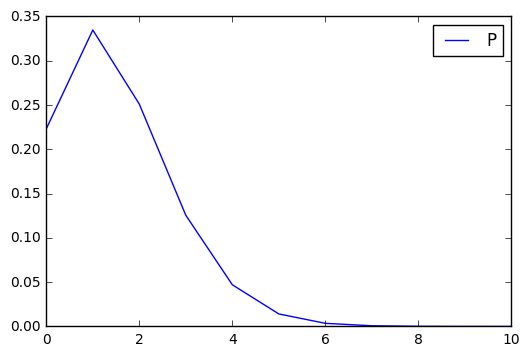

In [2]:
# define discrete pdf of Y
# uniform discrete distribution
# P = [0.25, 0.25, 0.25, 0.25]
mew = 1.5

# Poisson distribution
# P = [np.exp(-mew) * mew**k / factorial(k) for k in range(int(10+(mew)**2))]
P = [poisson.pmf(k, mew) for k in range(int(10+(mew)**1.5))]

plt.plot(P, label = "P")
plt.legend(loc = "best")
plt.show()

Calculate mean, variance, kurtosis of P

In [3]:
print_stat_details(P, "P")

mean of P: 1.49999385375
variance of P: 1.49994864544
kurtosis of P: 0.664793581132 



Calculate discrete pdf of Q, through convolution, and analytically. <br>
Addition of random variables of Possion distribution is summing up their lambda.

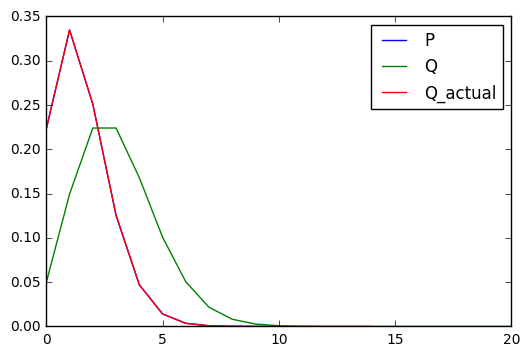

In [4]:
plt.plot(P, label = "P")

Q = np.convolve(P, P, mode="full")
plt.plot(Q, label = "Q" )

# Q_ = [np.absolute(0.0015*np.random.randn()) + poisson.pmf(k, mew) for k in range(int(10+(2*mew)**1.5))]
Q_ = [poisson.pmf(k, mew) for k in range(int(10+(2*mew)**1.5))]

plt.plot(Q_, label = "Q_actual")

plt.legend(loc='best')
plt.show()

Calculate mean, variance, kurtosis of Q

In [5]:
print_stat_details(Q, 'Q')

mean of Q: 2.99998605224
variance of Q: 2.99989563568
kurtosis of Q: 0.332402766548 



## Convolution through DFT
DFT = discrete Fourier transform <br>

Given random variable $P = Po(1.5)$, we want to calculate random $Q = P_1 + P_2$ with convolution. <br>
This time, convolution is done with Fourier transform.

1.0


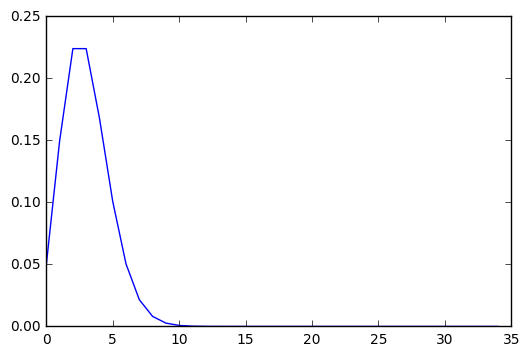

In [6]:
# define a pmf of of values of integers x starting from zero

mu = 3.
lengthP = int(30+(mu)**1.5)
pmfP = [np.exp(-mu) * mu**k / factorial(k) for k in range(lengthP)]
print np.sum(pmfP)

plt.plot(pmfP)
plt.show()

This step is unnecessary - translating the curve such that mean = 0

3


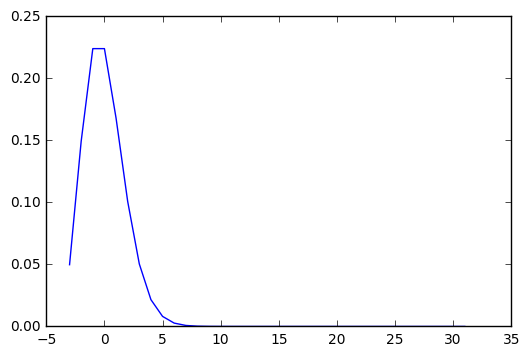

In [7]:
pmfP_X = np.arange(len(pmfP))
mean_pmfP_float = np.dot(pmfP_X, pmfP)  # take the mean
mean_pmfP = int(mean_pmfP_float)
print(mean_pmfP)

# pmfP_mean = np.add(pmfP_X, [-mean_pmfP]*len(pmfP))
pmfP_mean0 = pmfP
pmfP_X_mean0 = np.add(pmfP_X, [-mean_pmfP]*len(pmfP))

plt.plot(pmfP_X_mean0,pmfP_mean0)
plt.show()

This step is unnecessary - preparing the curve for Fourier transform

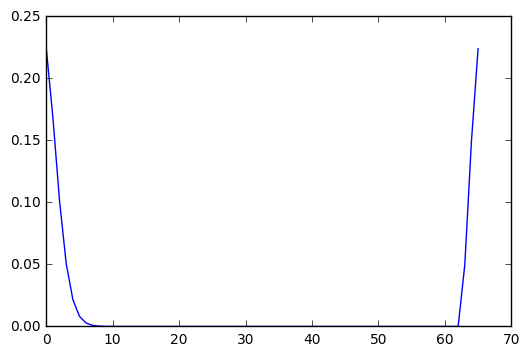

In [8]:
length = 2*len(pmfP_X)-mean_pmfP

pmf_X_mean0_ext = np.arange(0, length)
pmfP_mean0_ext = [0.0]*length
pmfP_mean0_ext[:length/2] = pmfP_mean0[mean_pmfP:]
pmfP_mean0_ext[-mean_pmfP:] = pmfP_mean0[:mean_pmfP]

plt.plot(pmfP_mean0_ext)
plt.show()

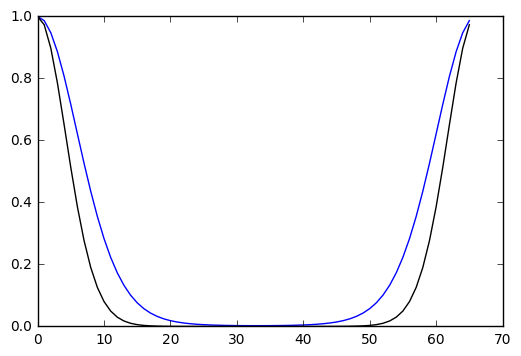

In [9]:
# frequnecy domain
# this thing is called characterisitc function

pmfP_spectrum = np.fft.fft(pmfP_mean0_ext)
pmfQ_spectrum = np.power(np.absolute(pmfP_spectrum),2)

plt.plot(np.absolute(pmfP_spectrum), color='b')
plt.plot(pmfQ_spectrum, color = 'k')
plt.show()

1.0


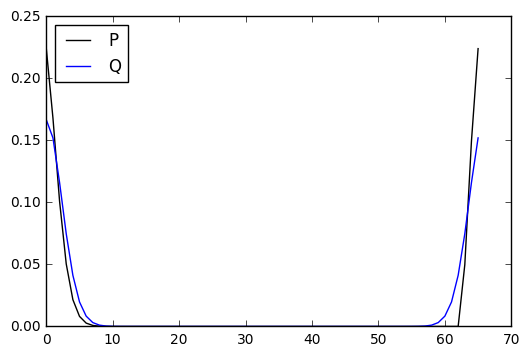

In [10]:
pmfQ_mean0_ext = np.fft.ifft(1j*np.array(pmfQ_spectrum))

print(np.sum(np.absolute(pmfQ_mean0_ext)))

plt.plot(pmfP_mean0_ext,color='k', label='P')
plt.plot(np.absolute(pmfQ_mean0_ext), label='Q')
plt.legend(loc = "best")
plt.show()

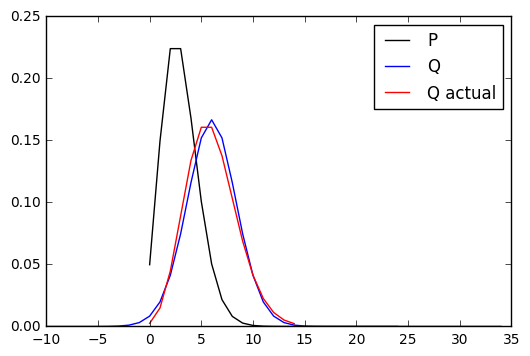

0.999999996486
mean of P: 3.0
variance of P: 3.0
kurtosis of P: 0.333333333333 

mean of Q: 6.00000000057
variance of Q: 5.99999946446
kurtosis of Q: 0.166662787067 



In [11]:
plt.plot(pmfP, color='k', label="P")

pmfQ = [0.0]*len(pmfP)
mean_pmfQ = int(2*mean_pmfP_float)

plot_offset = 10
pmfQ[:mean_pmfQ+plot_offset] = np.absolute(pmfQ_mean0_ext[-plot_offset-mean_pmfQ:])
pmfQ[mean_pmfQ+plot_offset:] = np.absolute(pmfQ_mean0_ext[:len(pmfQ)-plot_offset-mean_pmfQ])

plt.plot(np.arange(-10,len(pmfQ)-10), pmfQ, color='b', label="Q")

pmfQ_actual = [poisson.pmf(k, 2*mu) for k in range(int(10+(mu)**1.5))]
plt.plot(pmfQ_actual, color='r', label="Q actual")
plt.legend(loc="best")
plt.show()
print(np.sum(np.absolute(pmfQ)[:length/2]))

print_stat_details(pmfP, "P")
print_stat_details(pmfQ, "Q", plot_offset)

You see that the output through Fourier transform is symmetrical about its mean.

## Breaking up R into identitical S
Given random variable $R = Po(3.0)$, we want to calculate random variable $S$ such that $R= S_1 + S_2$ with convolution. <br>
We will use Fourier transform to calcuate the inverse of autocorrelation.

0.999997615802


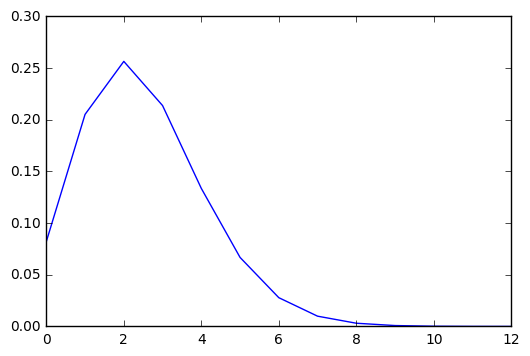

In [12]:
# define a pmf of of values of integers x starting from zero

mu = 2.5
pmfR = [poisson.pmf(k, mu) for k in range(int(10+(mu)**1.5))]
print np.sum(pmfR)

plt.plot(pmfR)
plt.show()

2


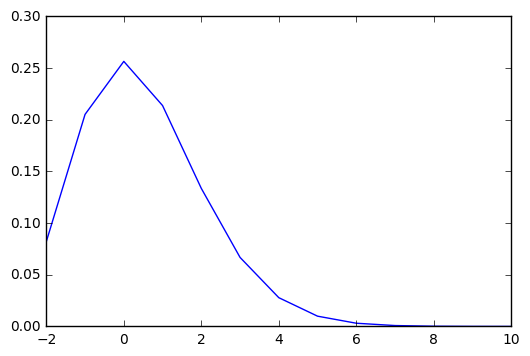

In [13]:
pmfR_X = np.arange(len(pmfR))
mean_pmfR_float = np.dot(pmfR_X, pmfR)  # take the mean
mean_pmfR = int(mean_pmfR_float)
print(mean_pmfR)

# pmfR_mean = np.add(pmfR_X, [-mean_pmfR]*len(pmfR))
pmfR_mean0 = pmfR
pmfR_X_mean0 = np.add(pmfR_X, [-mean_pmfR]*len(pmfR))

plt.plot(pmfR_X_mean0,pmfR_mean0)
plt.show()

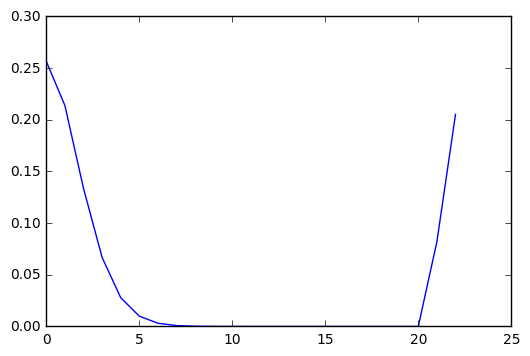

In [14]:
length = 2*len(pmfR_X)-mean_pmfR

pmf_X_mean0_ext = np.arange(0, length)
pmfR_mean0_ext = [0.0]*length
pmfR_mean0_ext[:length/2] = pmfR_mean0[mean_pmfR:]
pmfR_mean0_ext[-mean_pmfR:] = pmfR_mean0[:mean_pmfR]

plt.plot(pmfR_mean0_ext)
plt.show()

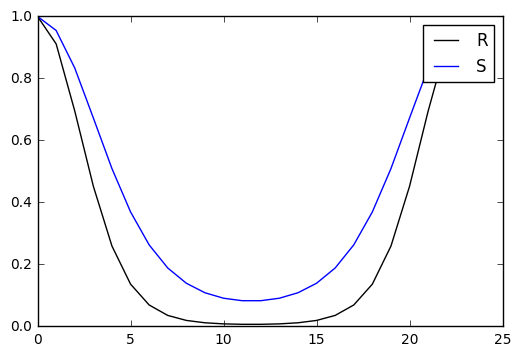

In [15]:
# frequnecy domain

pmfR_spectrum = np.fft.fft(pmfR_mean0_ext) 
pmfS_spectrum = np.power(np.absolute(pmfR_spectrum),0.5)

plt.plot(np.absolute(pmfR_spectrum), color='k', label = "R")
plt.plot(np.absolute(pmfS_spectrum), label = "S")
plt.legend()
plt.show()

1.00000978393


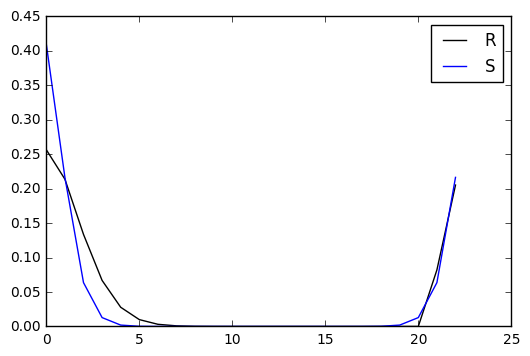

In [16]:
pmfS_mean0_ext = np.fft.ifft(pmfS_spectrum)

print(np.sum(np.absolute(pmfS_mean0_ext)))

plt.plot(pmfR_mean0_ext, color='k', label='R')
plt.plot(np.absolute(pmfS_mean0_ext), label='S')
plt.legend()
plt.show()

## Some issues with the mean
(huh?)

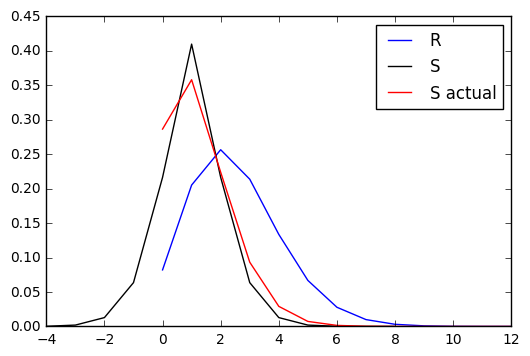

0.999969885133
mean of R: 2.49996850385
variance of R: 2.49972591455
kurtosis of R: 0.39570465491 

mean of S: 1.00003656606
variance of S: 1.24900683837
kurtosis of S: 0.782156283981 



In [17]:
plt.plot(pmfR, color='b', label='R')

pmfS = [0.0]*len(pmfR)
mean_pmfS = int(0.5*mean_pmfR_float)

plot_offset = int(10/mu)
pmfS[:mean_pmfS+plot_offset] = np.absolute(pmfS_mean0_ext[-plot_offset-mean_pmfS:])
pmfS[mean_pmfS+plot_offset:] = np.absolute(pmfS_mean0_ext[:len(pmfR)-plot_offset-mean_pmfS])

plt.plot(np.arange(-plot_offset,len(pmfS)-plot_offset), pmfS, color='k', label="S")

pmfS_actual = [poisson.pmf(k, mu/2) for k in range(int(10+(mu)**1.5))]
plt.plot(pmfS_actual, color='r', label="S actual")
plt.legend(loc="best")
plt.show()
print(np.sum(np.absolute(pmfS)[:length/2]))

print_stat_details(pmfR, "R")
print_stat_details(pmfS, "S", plot_offset)
# some issue with the MEAN of the constructed S